In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def plot_training_results(ax, rewards, accum_avg=False, mean=False):
    #plot rewards
    ax.plot(rewards, label='Training Rewards')

    #accumulated average
    if accum_avg:
        accumulated_average = np.cumsum(rewards) / (np.arange(len(rewards)) + 1)
        ax.plot(accumulated_average, 'r', label='Accumulated Average Reward')
    
    if mean:
        mean = np.mean(rewards)
        ax.axhline(mean, color='g', linestyle='--', label='Mean Reward')

    #labels, ticks, legend and grid
    ax.set_xlabel('Episodes')
    ax.set_ylabel('Rewards')
    ax.legend()
    ax.grid(True)

    

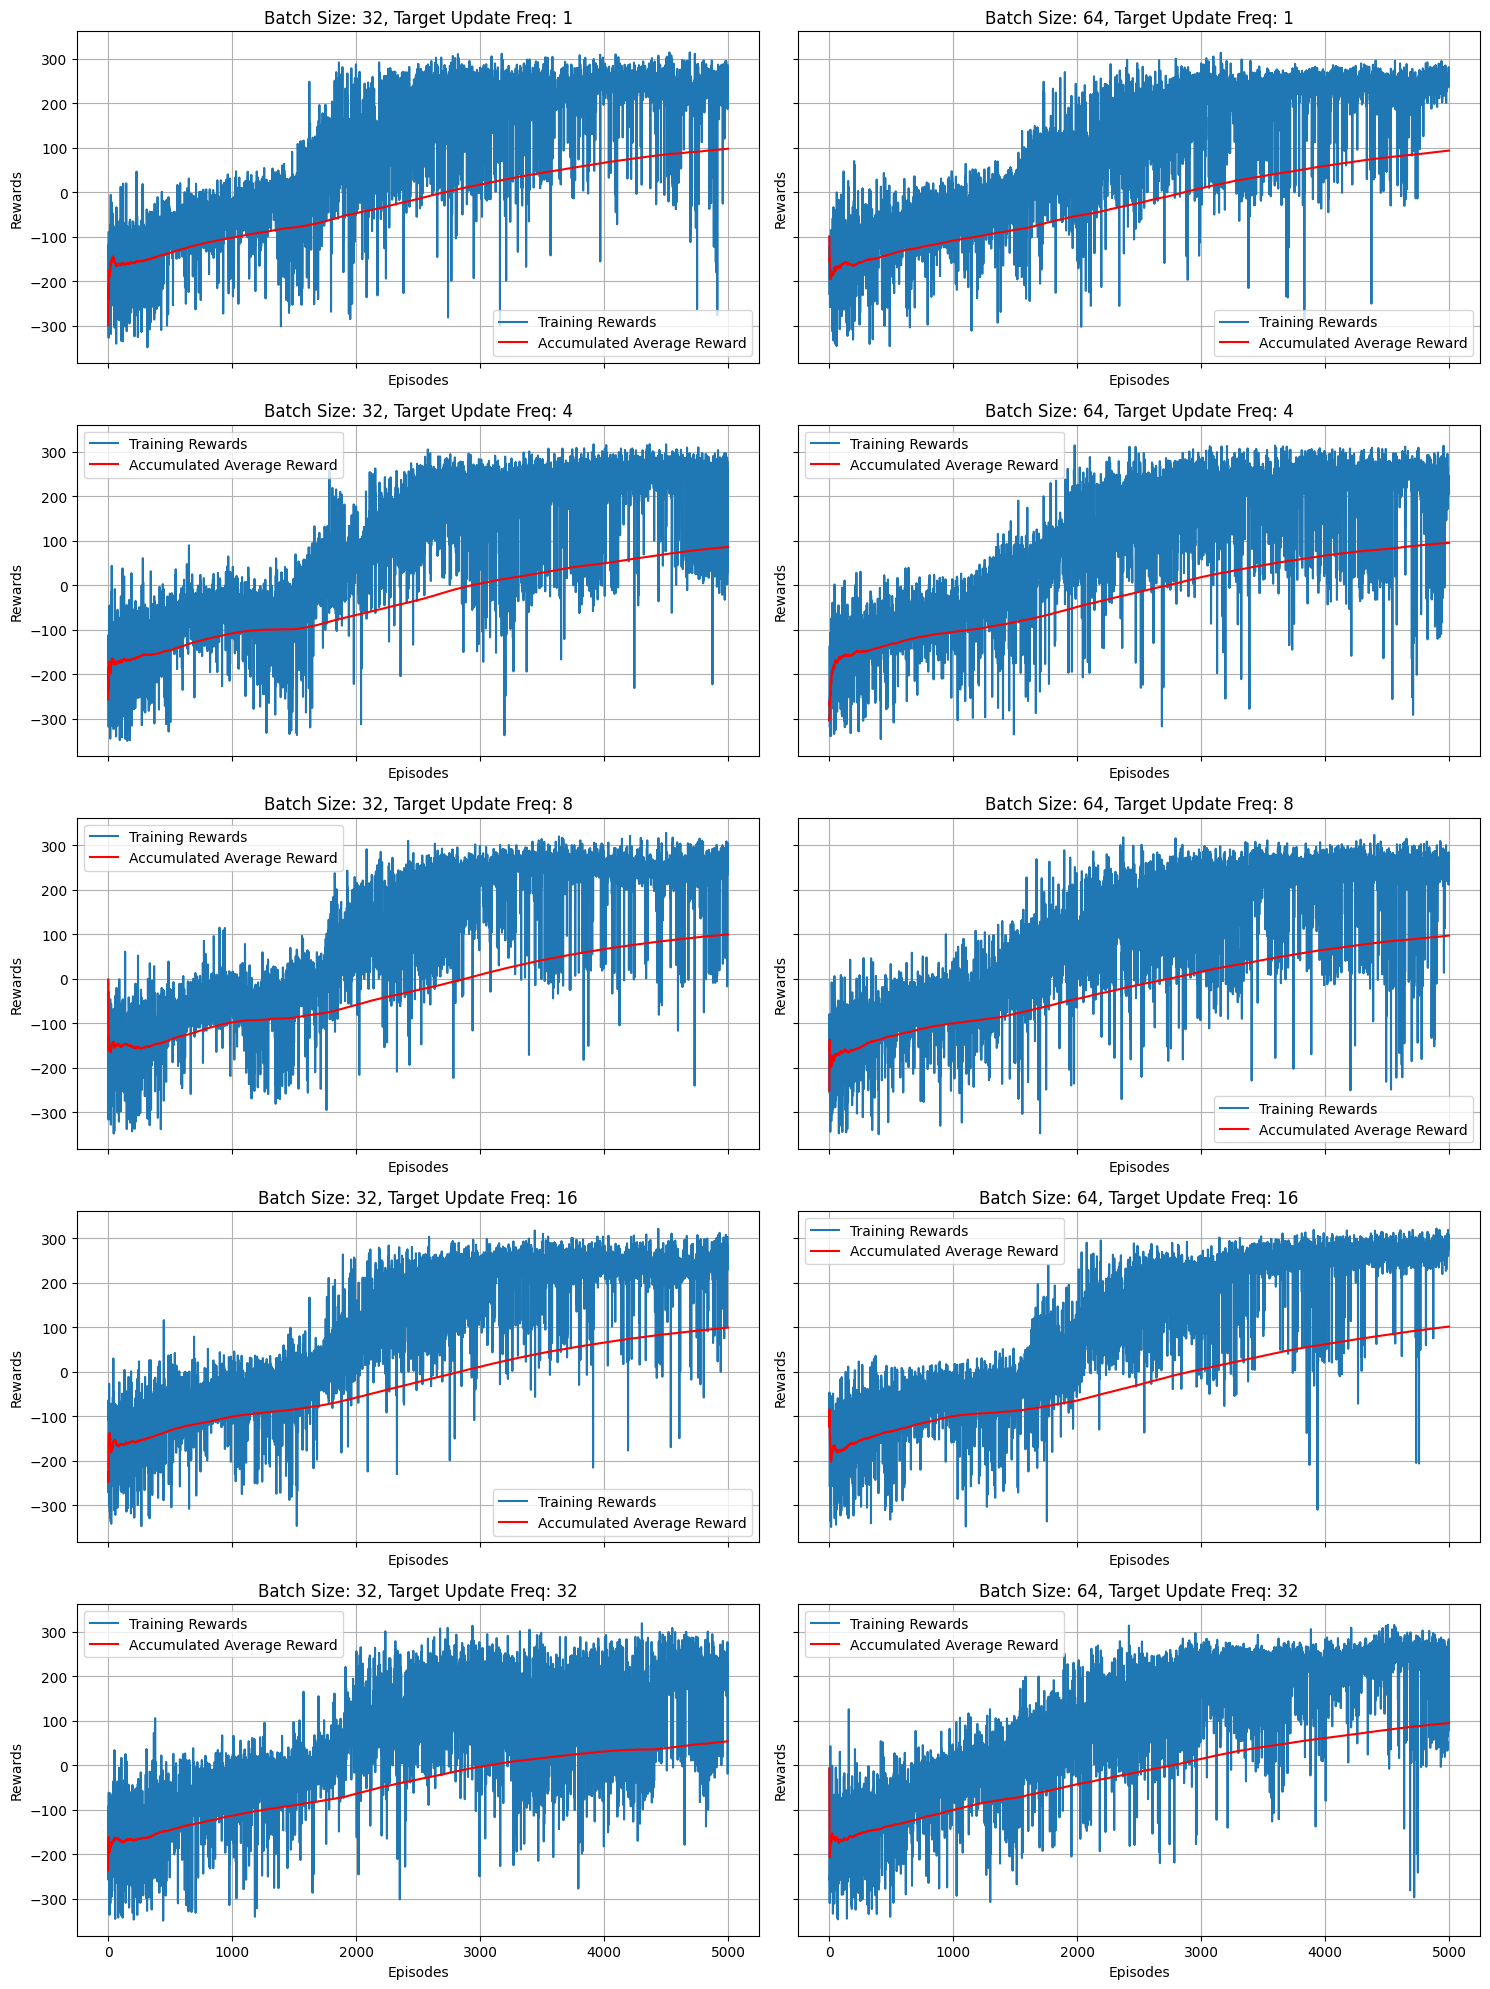

In [20]:
BATCH_SIZE = [32, 64]
TARGET_UPDATE_FREQ = [1, 4, 8, 16, 32]

fig, axs = plt.subplots(len(TARGET_UPDATE_FREQ), len(BATCH_SIZE), figsize=(15, 20), sharex=True, sharey=True)

for i, target_update_freq in enumerate(TARGET_UPDATE_FREQ):
    for j, batch_size in enumerate(BATCH_SIZE):
        ax = axs[i, j]
        PATH = f"models/batch_size_{batch_size}/target_update_freq_{target_update_freq}"
        rewards = np.load(f"{PATH}/train_reward.npy")
        plot_training_results(ax, rewards, accum_avg=True)
        ax.set_title(f'Batch Size: {batch_size}, Target Update Freq: {target_update_freq}')

plt.tight_layout()
plt.show()

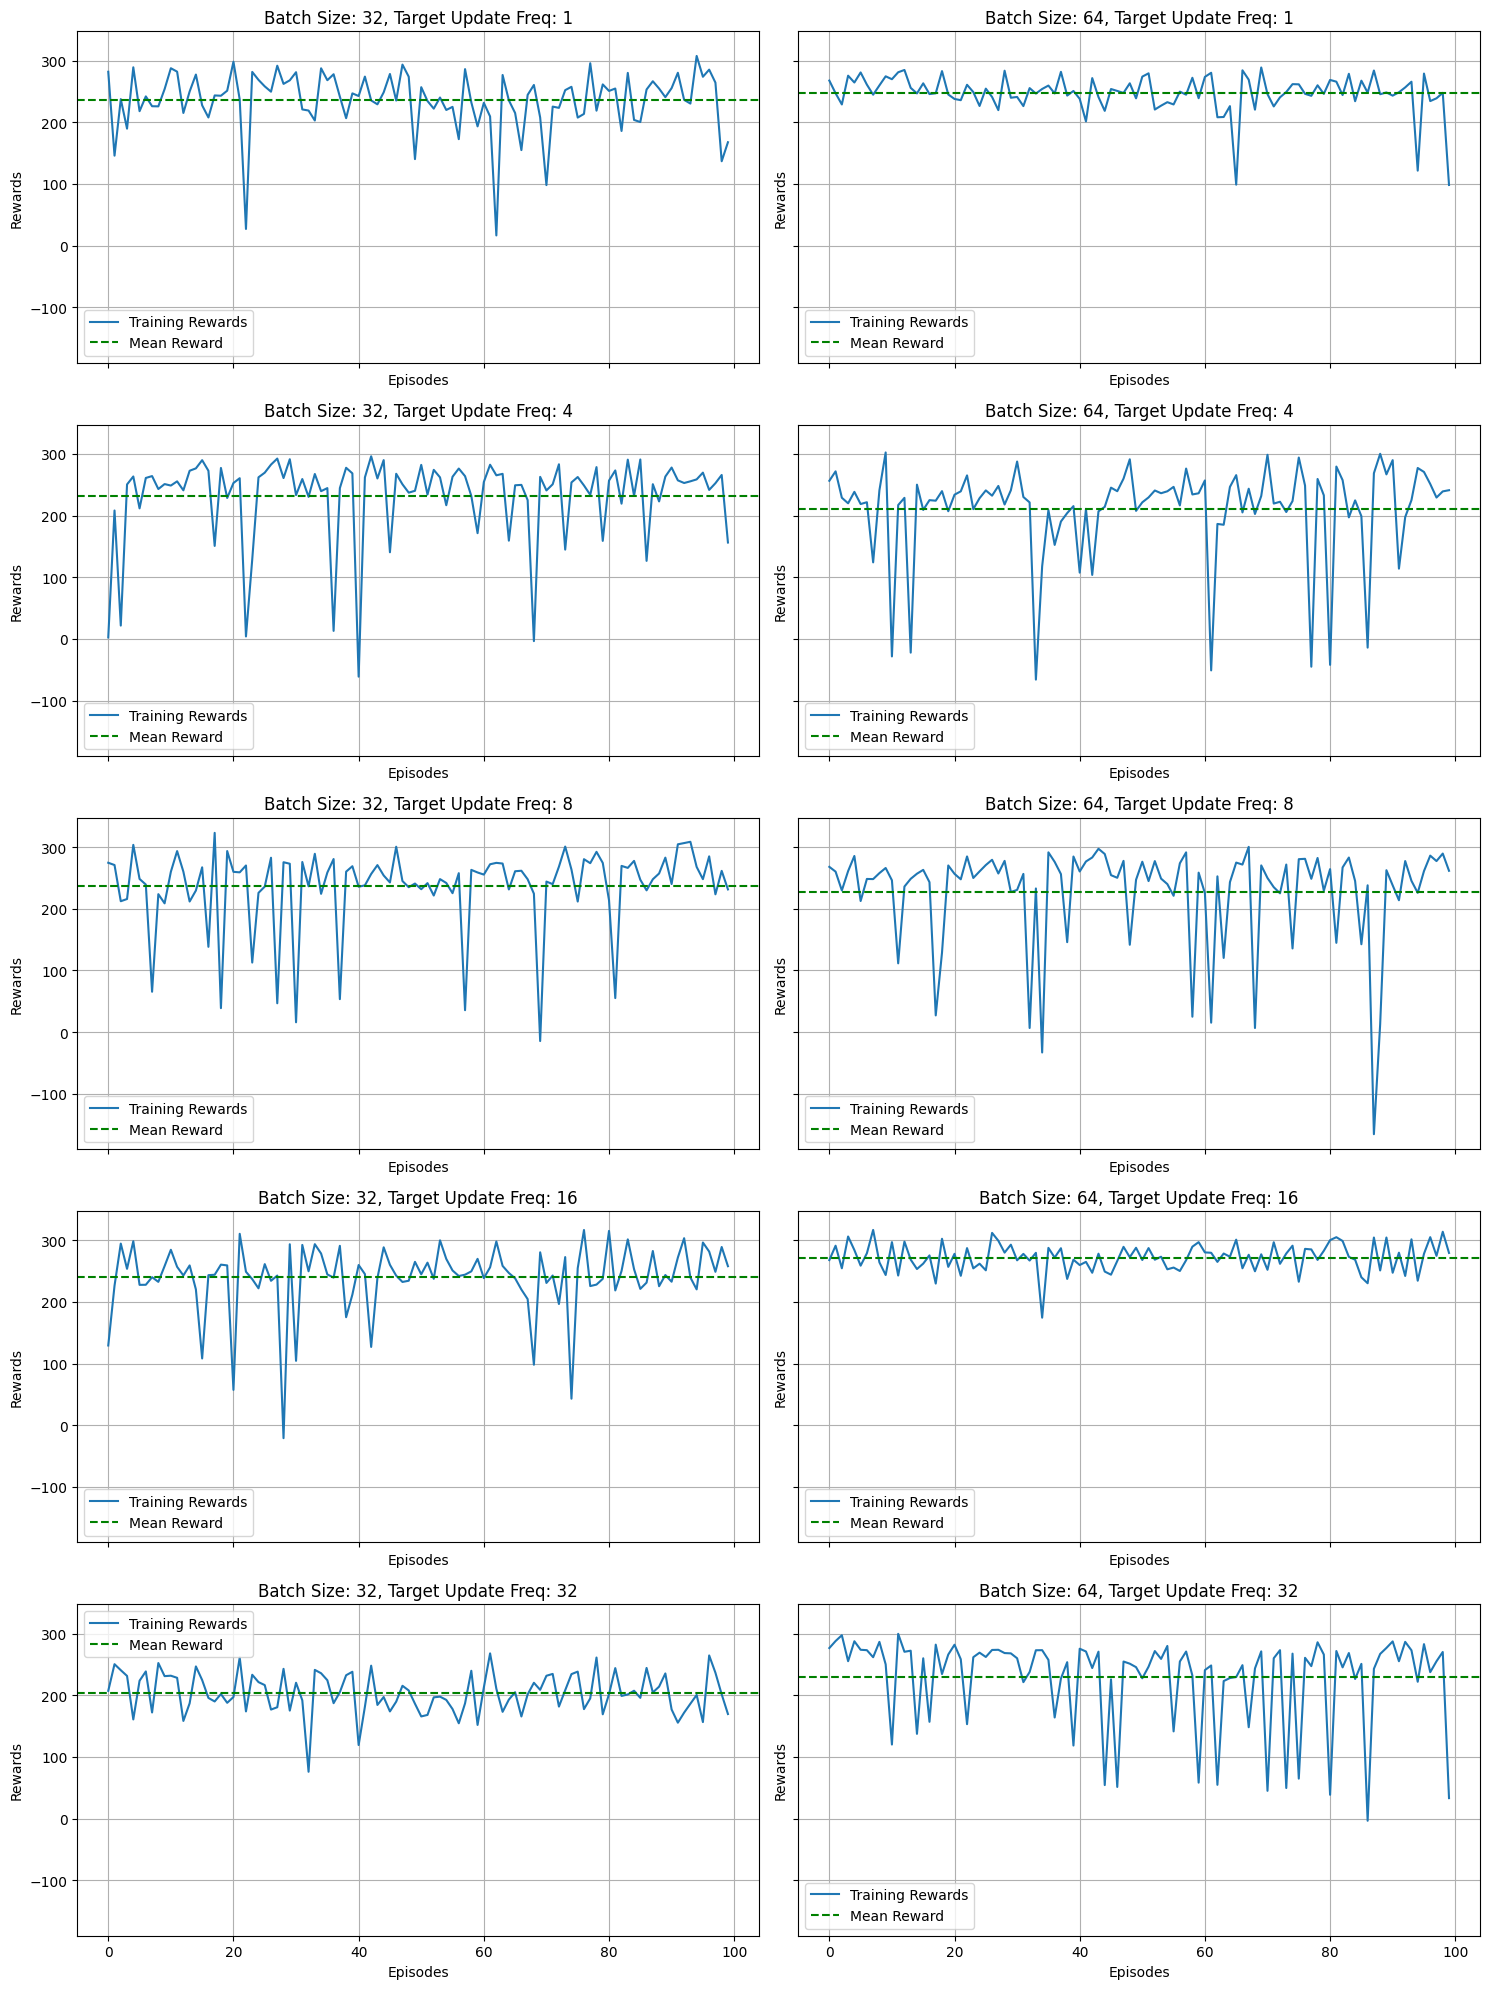

In [21]:
BATCH_SIZE = [32, 64]
TARGET_UPDATE_FREQ = [1, 4, 8, 16, 32]

fig, axs = plt.subplots(len(TARGET_UPDATE_FREQ), len(BATCH_SIZE), figsize=(15, 20), sharex=True, sharey=True)

for i, target_update_freq in enumerate(TARGET_UPDATE_FREQ):
    for j, batch_size in enumerate(BATCH_SIZE):
        ax = axs[i, j]
        PATH = f"models/batch_size_{batch_size}/target_update_freq_{target_update_freq}"
        rewards = np.load(f"{PATH}/test_rewards.npy")
        plot_training_results(ax, rewards, accum_avg=False, mean=True)
        ax.set_title(f'Batch Size: {batch_size}, Target Update Freq: {target_update_freq}')

plt.tight_layout()
plt.show()